# Chinese Postman Problem (CPP)
What is the shortest path that starts and ends at the same node, and covers every edge at least once?<br>

## Eulerian graph
If all vertices in the graph have even degree then the solution is easy, because you just have to find an Eulerian circuit.

## Non eulerian graph
If some vertices have odd degree then there´s not directly solution and we are gonna have to add extra edges to make it Eurelian.

### Check for eulerian graph
First, check if all nodes have even degree (i.e. if it's already Eulerian)

The graph is not Eulerian
Odd degree nodes: ['a', 'b', 'd', 'c']


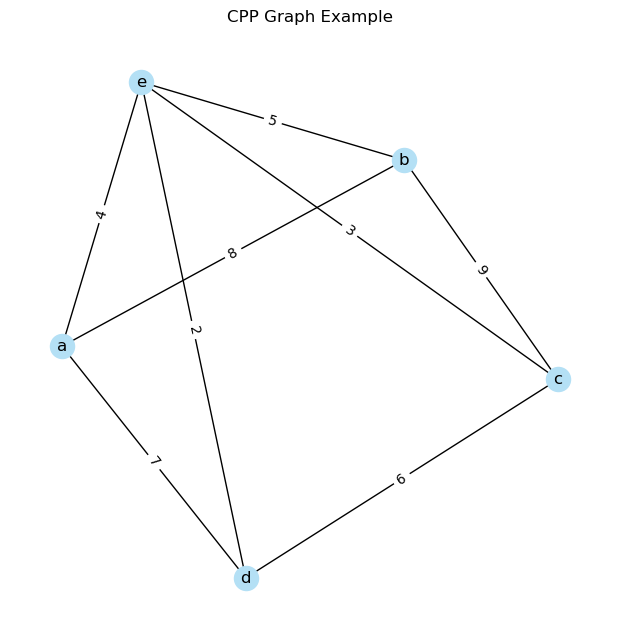

In [18]:
import networkx as nx
from cpp_graphs import random_cpp_graph, random_dcpp_graph, draw_graph

G = nx.Graph()
G.add_weighted_edges_from([
    ("a", "b", 8), # start of edge, end of edge, weight
    ("a", "d", 7),
    ("a", "e", 4),
    ("b", "c", 9),
    ("b", "e", 5),
    ("c","d",6),
    ("c", "e", 3),
    ("d", "e", 2),
])
unique_nodes = ['a', 'b', 'c', 'd']


check_list = [e for e, deg in G.degree() if deg % 2 != 0]
if len(check_list) == 0:
    print("The graph is Eulerian")
else:
    print("The graph is not Eulerian")
    print("Odd degree nodes:", check_list)
draw_graph(G, "CPP Graph Example")


### The shortest path
We want to know the shortest path from every vertice with all of the others. For example, how much does it cost the shortest path to go from a to c. We can use Dijkstra algorithm

{('a', 'b'): 8, ('a', 'd'): 6, ('a', 'c'): 7, ('b', 'd'): 7, ('b', 'c'): 8, ('d', 'c'): 5}


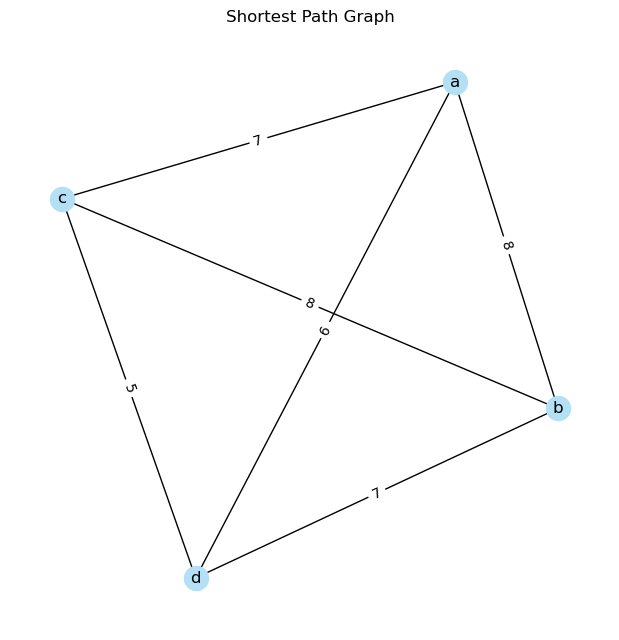

In [27]:
import itertools

pair_weights = {}
for u, v in itertools.combinations(check_list, 2):
    length = nx.dijkstra_path_length(G, u, v)
    pair_weights[(u, v)] = length

print(pair_weights)

Gshort = nx.Graph()
Gshort.add_weighted_edges_from([
    ("a", "b", 8), # start of edge, end of edge, weight
    ("a", "d", 6),
    ('a', 'c', 7),
    ('b', 'd', 7),
    ('b', 'c', 8), 
    ('d', 'c', 5)
])

draw_graph(Gshort, "Shortest Path Graph")


### Matchmaking

With this information we know we want duplicate some edges so we can have all even nodes. But how do we find the optimal matchmaking?<br>
First, we extract the nodes